# Plotting 

## Notebook to create plots with logged data

In [1]:
import os
from pathlib import Path
import pandas as pd
import cablab.common.plotting as plotting

<Figure size 7200x4800 with 0 Axes>

In [2]:
# create output path for plots
home_path = str(Path.home())
output_path = os.path.join(home_path, "Desktop", "runs")
if not os.path.exists(output_path):
    os.makedirs(output_path)

## Compare different runs (Single Agent)

In [62]:
files = ["/home/niko/Info/cablab/runs/dqn/0/logs.csv", "/home/niko/Info/cablab/runs/dqn/1/logs.csv", "/home/niko/Info/cablab/runs/ppo/0/logs.csv"]
ids = [["rewards"],["n_passengers"],["illegal_moves"],["mean_actions_per_pick_up"]]
labels = ["DQN", "M-DQN", "PPO"]
colors = ["orange", "green", "blue"]

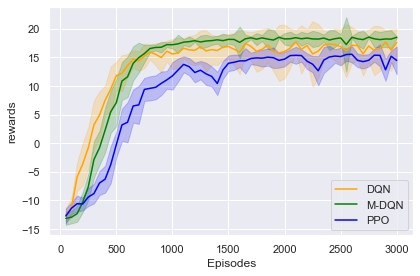

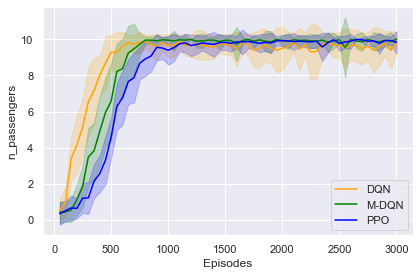

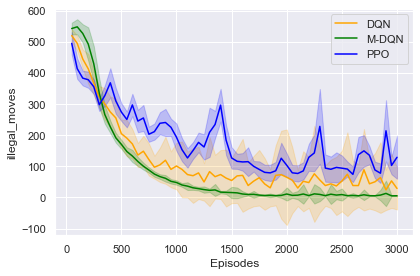

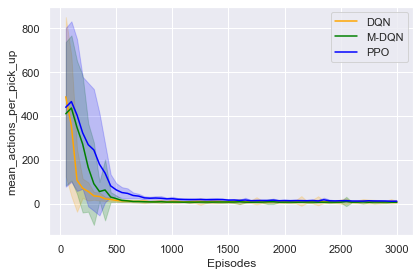

In [63]:
dfs = []
for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    df['illegal_moves'] = df['illegal_moves'] + df['illegal_pick_ups']
    dfs.append(df)

for id in ids:
    plotting.plot_mult_agent(dfs, id, output_path,labels,colors=colors)

## Compare differnt eval runs (Multi-Agent)

In [16]:
files = ["/home/niko/Info/cablab/runs/ma-dqn/3/eval/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/4/eval/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/5/eval/logs_summed.csv"]

ids = [["rewards"],["n_passengers"],["illegal_moves"],["mean_actions_per_pick_up"]]
labels = ["Stage 2","Stage 0", "Stage 1"]
colors = ["orange", "blue", "green"]

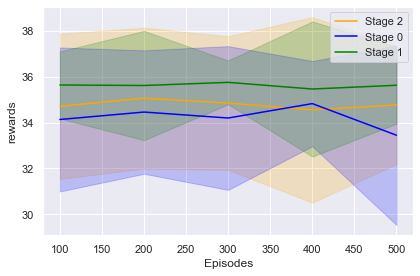

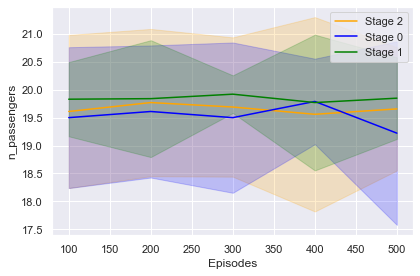

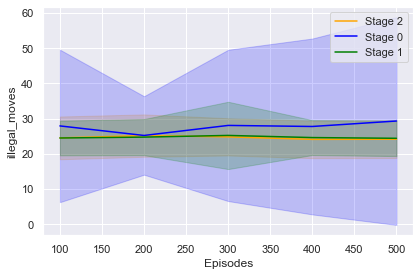

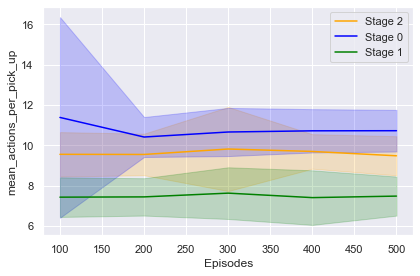

In [17]:
dfs = []

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df)

for id in ids:
    plotting.plot_mult_agent(dfs, id, output_path,labels,colors=colors)

## Compare differnent training runs (Multi-Agent)

In [3]:
files = ["/home/niko/Info/cablab/runs/ma-dqn/4/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/5/logs_summed.csv","/home/niko/Info/cablab/runs/ma-dqn/3/logs_summed.csv"]
ids = [["rewards"],["n_passengers"],["illegal_moves"],["mean_actions_per_pick_up"]]
labels = ["Stage 0", "Stage 1","Stage 2"]
colors = ["orange", "blue", "green"]

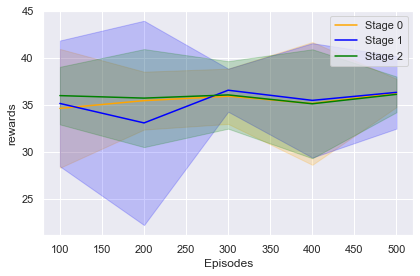

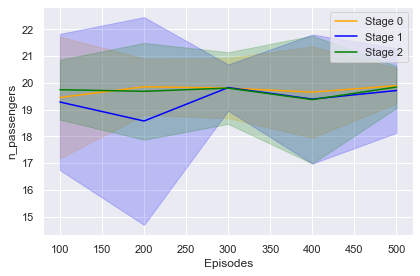

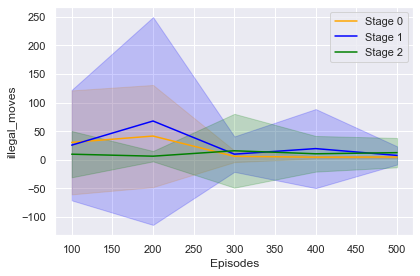

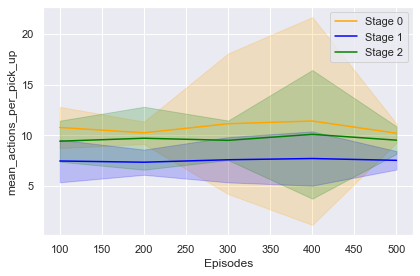

In [5]:
dfs = []
for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df[-500:])

for id in ids:
    plotting.plot_mult_agent(dfs, id, output_path,labels,colors=colors)

In [41]:
for df in dfs:
    print(df['avg_waiting_time'][4990:].mean())

14.624440362708054
12.875115094088875
14.324758042697974


## Compare eval runs (Multi-Agent)

In [4]:
files = ["/home/niko/Info/cablab/runs/ma-dqn/52/eval/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/55/eval/logs_summed.csv", "/home/niko/Info/cablab/runs/ma-dqn/56/eval/logs_summed.csv"]
ids = [["rewards"],["n_passengers"],["illegal_moves"],["avg_waiting_time"]]
labels = ["Stage 0", "Stage 2", "Stage 1"]
colors = ["orange", "blue", "green"]

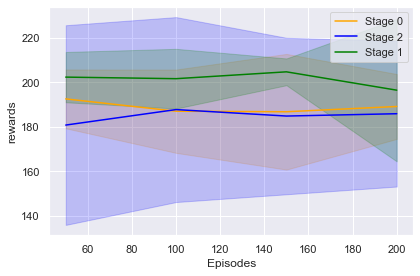

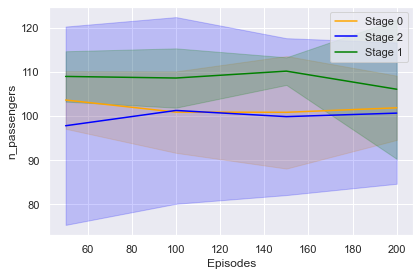

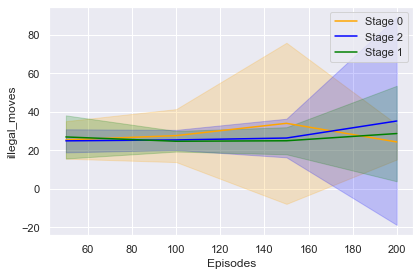

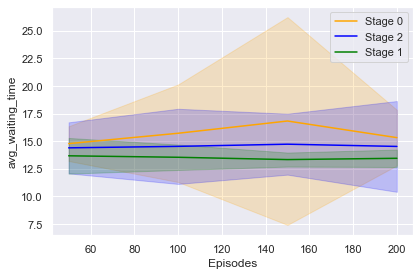

In [5]:
dfs = []

for i,file in enumerate(files): 
    df = pd.DataFrame()
    df = pd.read_csv(file)
    dfs.append(df)

for id in ids:
    plotting.plot_mult_agent(dfs, id, output_path,labels,colors=colors)

# Final Plots

In [3]:
import seaborn as sns
import pandas as pd

sns.set(rc={"figure.figsize":(6, 4)})

In [4]:
smoothing = 50

def create_common_df(names, files_arr):
    dfs = []
    for name, files in zip(names, files_arr): 
        for file in files:
            df = pd.DataFrame()
            df = pd.read_csv(file)

            df['algorithm'] = name
            df['episode'] = df.index + 1

            df['rewards'] = df['rewards'].rolling(smoothing,min_periods=1).mean() 
            df['n_passengers'] = df['n_passengers'].rolling(smoothing,min_periods=1).mean()
            df['illegal_moves'] = df['illegal_moves'].rolling(smoothing,min_periods=1).mean() 
            df['mean_actions_per_pick_up'] = df['mean_actions_per_pick_up'].rolling(smoothing,min_periods=1).mean() 
            df['avg_waiting_time'] = df['avg_waiting_time'].rolling(smoothing,min_periods=1).mean() 

            dfs.append(df)     

    df = pd.concat(dfs)
    return df

## Cabworld-v0

In [15]:
ppo_files = ["/home/niko/Info/final-runs/v0/PPO/0/logs.csv","/home/niko/Info/final-runs/v0/PPO/1/logs.csv","/home/niko/Info/final-runs/v0/PPO/2/logs.csv","/home/niko/Info/final-runs/v0/PPO/3/logs.csv","/home/niko/Info/final-runs/v0/PPO/4/logs.csv"]

dqn_files = ["/home/niko/Info/final-runs/v0/DQN/0/logs.csv"]

mdqn_files = ["/home/niko/Info/final-runs/v0/M-DQN/0/logs.csv"]

files_arr = [ppo_files, dqn_files, mdqn_files]
names = ['PPO','DQN','M-DQN']

In [16]:
df = create_common_df(names, files_arr)

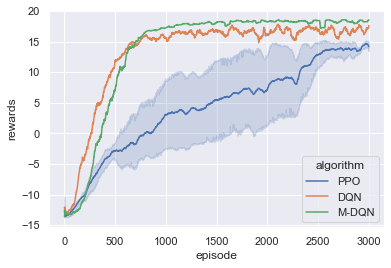

In [63]:
sns.set(rc={"figure.figsize":(6, 4)})

# Rewards
fig = sns.lineplot(data=df, x="episode", y="rewards", hue="algorithm")
fig.figure.savefig("/home/niko/Desktop/runs/rewards_v0.png", dpi=600)

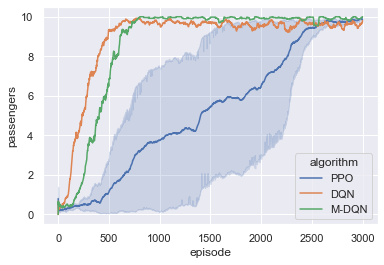

In [17]:
# Passenger
fig = sns.lineplot(data=df, x="episode", y="n_passengers", hue="algorithm")
fig.set(ylabel = "passengers")
fig.figure.savefig("/home/niko/Desktop/runs/n_passengers_v0.png", dpi=600)

In [ ]:
# Illegal moves
fig = sns.lineplot(data=df, x="episode", y="illegal_moves", hue="algorithm")
fig.set(ylabel = "illegal moves")
fig.figure.savefig("/home/niko/Desktop/runs/illegal_moves_v0.png", dpi=600)

In [ ]:
# Useless steps
fig =  sns.lineplot(data=df, x="episode", y="mean_actions_per_pick_up", hue="algorithm")
fig.set(ylabel = "mean_actions_per_pick_up")
fig.figure.savefig("/home/niko/Desktop/runs/useless_steps_v0.png", dpi=600)

## Cabworld-v1

In [39]:
ppo_files = ["/home/niko/Info/final-runs/v1/PPO/0/logs.csv","/home/niko/Info/final-runs/v1/PPO/1/logs.csv","/home/niko/Info/final-runs/v1/PPO/2/logs.csv","/home/niko/Info/final-runs/v1/PPO/3/logs.csv","/home/niko/Info/final-runs/v1/PPO/4/logs.csv"]

dqn_files = ["/home/niko/Info/final-runs/v1/DQN/0/logs.csv","/home/niko/Info/final-runs/v1/DQN/1/logs.csv","/home/niko/Info/final-runs/v1/DQN/2/logs.csv","/home/niko/Info/final-runs/v1/DQN/3/logs.csv","/home/niko/Info/final-runs/v1/DQN/4/logs.csv"]

mdqn_files = ["/home/niko/Info/final-runs/v1/M-DQN/0/logs.csv","/home/niko/Info/final-runs/v1/M-DQN/1/logs.csv","/home/niko/Info/final-runs/v1/M-DQN/2/logs.csv","/home/niko/Info/final-runs/v1/M-DQN/3/logs.csv","/home/niko/Info/final-runs/v1/M-DQN/4/logs.csv"]

files_arr = [ppo_files, dqn_files, mdqn_files]
names = ['PPO','DQN', 'M-DQN']

In [42]:
df = create_common_df(names, files_arr)

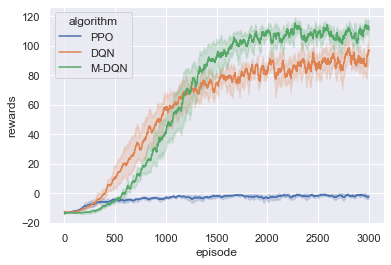

In [43]:
sns.set(rc={"figure.figsize":(6, 4)})

# Rewards
fig = sns.lineplot(data=df, x="episode", y="rewards", hue="algorithm")
fig.figure.savefig("/home/niko/Desktop/runs/rewards_v1.png", dpi=600)

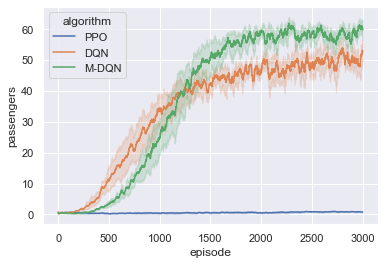

In [5]:
# Passenger
fig = sns.lineplot(data=df, x="episode", y="n_passengers", hue="algorithm")
fig.set(ylabel = "passengers")
fig.figure.savefig("/home/niko/Desktop/runs/n_passengers_v1.png", dpi=600)


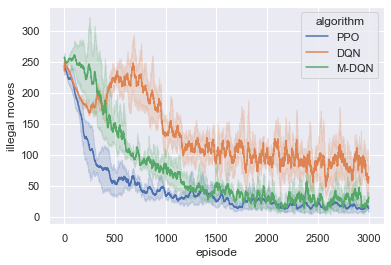

In [6]:
# Illegal moves
fig = sns.lineplot(data=df, x="episode", y="illegal_moves", hue="algorithm")
fig.set(ylabel = "illegal moves")
fig.figure.savefig("/home/niko/Desktop/runs/illegal_moves_v1.png", dpi=600)

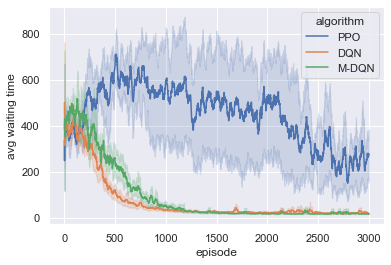

In [7]:
# Avg waiting time
fig =  sns.lineplot(data=df, x="episode", y="avg_waiting_time", hue="algorithm")
fig.set(ylabel = "avg waiting time")
fig.figure.savefig("/home/niko/Desktop/runs/avg_waiting_time_v1.png", dpi=600)

## Cabworld-v2

In [10]:
stage0_files = ["/home/niko/Info/final-runs/v2/Stage0/4/logs_summed.csv"]
stage1_files = ["/home/niko/Info/final-runs/v2/Stage1/5/logs_summed.csv"]
stage2_files = ["/home/niko/Info/final-runs/v2/Stage2/3/logs_summed.csv"]

files_arr = [stage0_files, stage1_files, stage2_files]
names = ['Stage 0','Stage 1', 'Stage 2']

In [11]:
df = create_common_df(names, files_arr)

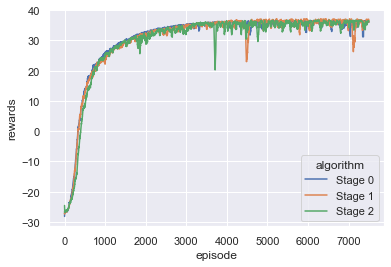

In [13]:
# Rewards
fig = sns.lineplot(data=df, x="episode", y="rewards", hue="algorithm")
fig.figure.savefig("/home/niko/Desktop/runs/rewards_v2.png", dpi=600)

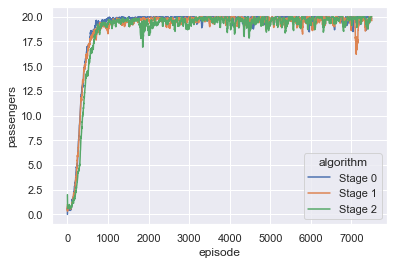

In [14]:
# Passenger
fig = sns.lineplot(data=df, x="episode", y="n_passengers", hue="algorithm")
fig.set(ylabel = "passengers")
fig.figure.savefig("/home/niko/Desktop/runs/n_passengers_v2.png", dpi=600)

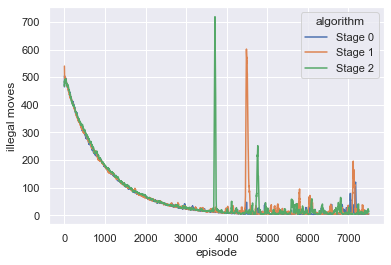

In [15]:
# Illegal moves
fig = sns.lineplot(data=df, x="episode", y="illegal_moves", hue="algorithm")
fig.set(ylabel = "illegal moves")
fig.figure.savefig("/home/niko/Desktop/runs/illegal_moves_v2.png", dpi=600)

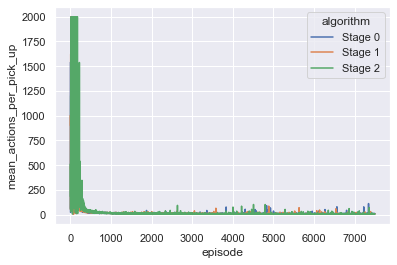

In [16]:
# Avg waiting time
fig =  sns.lineplot(data=df, x="episode", y="mean_actions_per_pick_up", hue="algorithm")
fig.set(ylabel = "mean_actions_per_pick_up")
fig.figure.savefig("/home/niko/Desktop/runs/useless_steps_v2.png", dpi=600)

## Eval runs


In [8]:
stage0_files = ["/home/niko/Info/final-runs/v2/Stage0/Eval/0/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage0/Eval/1/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage0/Eval/2/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage0/Eval/3/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage0/Eval/4/logs_summed.csv"]

stage1_files = ["/home/niko/Info/final-runs/v2/Stage1/Eval/0/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage1/Eval/1/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage1/Eval/2/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage1/Eval/3/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage1/Eval/4/logs_summed.csv"]

#stage2_files = ["/home/niko/Info/final-runs/v2/Stage2/Eval/0/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage2/Eval/1/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage2/Eval/2/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage2/Eval/3/logs_summed.csv","/home/niko/Info/final-runs/v2/Stage2/Eval/4/logs_summed.csv"]

stage2_files = ["/home/niko/Info/cablab/runs/adv/11/logs_summed.csv"]

files_arr = [stage0_files, stage1_files ,stage2_files]
names = ['Stage 0','Stage 1','Stage 2']

In [9]:
df = create_common_df(names, files_arr)

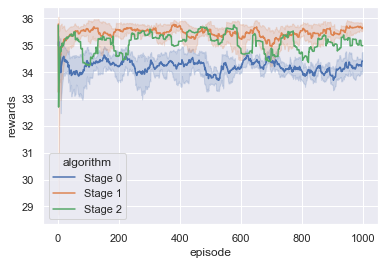

In [10]:
# Rewards
fig = sns.lineplot(data=df, x="episode", y="rewards", hue="algorithm")
fig.figure.savefig("/home/niko/Desktop/runs/rewards_v2.png", dpi=600)

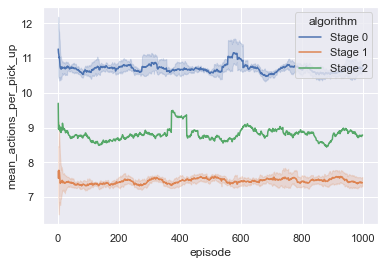

In [11]:
# Avg waiting time
fig =  sns.lineplot(data=df, x="episode", y="mean_actions_per_pick_up", hue="algorithm")
fig.set(ylabel = "mean_actions_per_pick_up")
fig.figure.savefig("/home/niko/Desktop/runs/useless_steps_v2.png", dpi=600)

## Adv runs

In [23]:
stage2_files = ["/home/niko/Info/final-runs/v2/Adv/0/logs_summed.csv"]

files_arr = [stage2_files]
names = ['Stage 2']

In [24]:
df = create_common_df(names, files_arr)

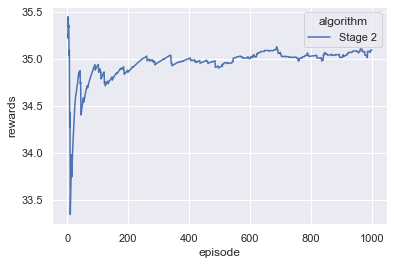

In [26]:
# Rewards
fig = sns.lineplot(data=df, x="episode", y="rewards", hue="algorithm")
fig.figure.savefig("/home/niko/Desktop/runs/rewards_v2.png", dpi=600)

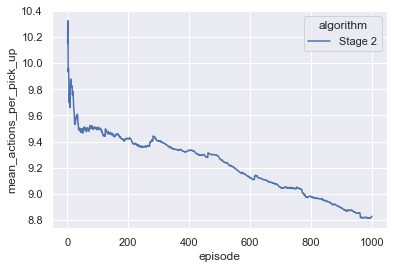

In [25]:
# Avg waiting time
fig =  sns.lineplot(data=df, x="episode", y="mean_actions_per_pick_up", hue="algorithm")
fig.set(ylabel = "mean_actions_per_pick_up")
fig.figure.savefig("/home/niko/Desktop/runs/useless_steps_v2.png", dpi=600)

## Cabworld-v3


In [1]:
import seaborn as sns
import pandas as pd

dfs = []
smoothing = 100

In [3]:
stage0_files = ["//home/niko/Info/final-runs/v3/Stage0/7/logs_summed.csv"]
stage1_files = ["//home/niko/Info/final-runs/v3/Stage1/8/logs_summed.csv"]
stage2_files = ["/home/niko/Info/final-runs/v3/Stage2/6/logs_summed.csv"]

files_arr = [stage0_files,stage1_files, stage2_files]
names = ['Stage 0', 'Stage 1','Stage 2']

In [7]:
df = create_common_df(names, files_arr)

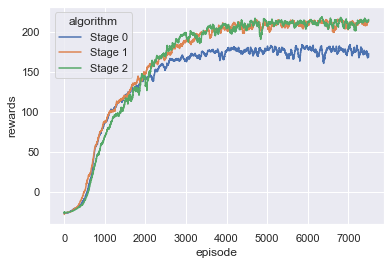

In [8]:
# Rewards
fig = sns.lineplot(data=df, x="episode", y="rewards", hue="algorithm")
fig.figure.savefig("/home/niko/Desktop/runs/rewards_v2.png", dpi=600)

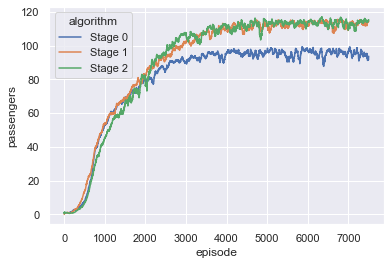

In [9]:
# Passenger
fig = sns.lineplot(data=df, x="episode", y="n_passengers", hue="algorithm")
fig.set(ylabel = "passengers")
fig.figure.savefig("/home/niko/Desktop/runs/n_passengers_v2.png", dpi=600)

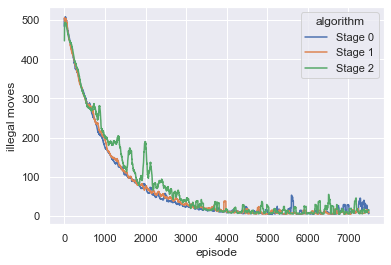

In [10]:
# Illegal moves
fig = sns.lineplot(data=df, x="episode", y="illegal_moves", hue="algorithm")
fig.set(ylabel = "illegal moves")
fig.figure.savefig("/home/niko/Desktop/runs/illegal_moves_v2.png", dpi=600)

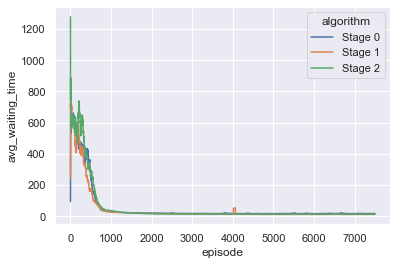

In [11]:
# Avg waiting time
fig =  sns.lineplot(data=df, x="episode", y="avg_waiting_time", hue="algorithm")
fig.set(ylabel = "avg_waiting_time")
fig.figure.savefig("/home/niko/Desktop/runs/useless_steps_v2.png", dpi=600)

## Eval runs

In [1]:
stage0_files = ["//home/niko/Info/final-runs/v3/Stage0/7/eval/logs_summed.csv"]
stage1_files = ["//home/niko/Info/final-runs/v3/Stage1/8/eval/logs_summed.csv"]
stage2_files = ["/home/niko/Info/cablab/runs/adv/10/logs_summed.csv"]

files_arr = [stage0_files, stage1_files, stage2_files]
names = ['Stage 0','Stage 1','Stage 2']

In [5]:
df = create_common_df(names, files_arr)

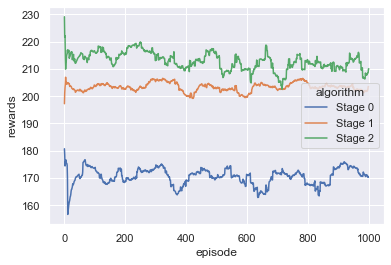

In [6]:
# Rewards
fig = sns.lineplot(data=df, x="episode", y="rewards", hue="algorithm")
fig.figure.savefig("/home/niko/Desktop/runs/rewards_v2.png", dpi=600)

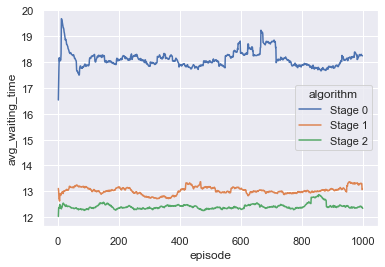

In [7]:
# Avg waiting time
fig =  sns.lineplot(data=df, x="episode", y="avg_waiting_time", hue="algorithm")
fig.set(ylabel = "avg_waiting_time")
fig.figure.savefig("/home/niko/Desktop/runs/useless_steps_v2.png", dpi=600)

## Adv runs

In [31]:
stage2_files = ["/home/niko/Info/final-runs/v3/Adv/0/logs_summed.csv", "/home/niko/Info/final-runs/v3/Adv/1/logs_summed.csv"]

files_arr = [stage2_files]
names = ['Stage 2']

In [32]:
df = create_common_df(names, files_arr)

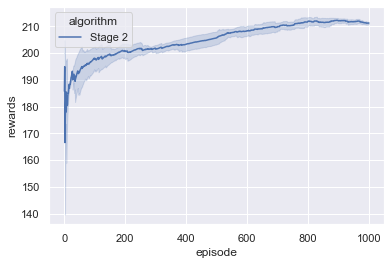

In [33]:
# Rewards
fig = sns.lineplot(data=df, x="episode", y="rewards", hue="algorithm")
fig.figure.savefig("/home/niko/Desktop/runs/rewards_v2.png", dpi=600)

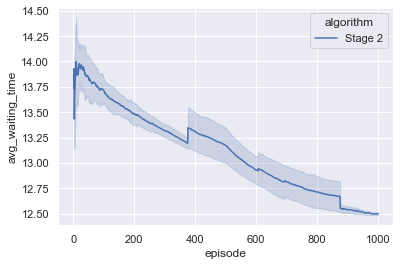

In [34]:
# Rewards
fig = sns.lineplot(data=df, x="episode", y="avg_waiting_time", hue="algorithm")
fig.figure.savefig("/home/niko/Desktop/runs/rewards_v2.png", dpi=600)